# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.to_csv("../data/raw/raw_data.csv", index = False)

In [4]:
#EXPLORACION Y LIMPIEZA DE DATOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Detectar duplicados
df.drop("id", axis = 1).duplicated().sum()

np.int64(0)

In [7]:
#Eliminar información irrelevante (aqui nos interesa el precio, qie información es irrelevante con respecto al precio)
columnas_irrelevantes = ['name','host_name','last_review','reviews_per_month','number_of_reviews','id']
print(columnas_irrelevantes)

df.drop(columnas_irrelevantes, axis=1 , inplace=True, errors = 'ignore')

df.info()


['name', 'host_name', 'last_review', 'reviews_per_month', 'number_of_reviews', 'id']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


/tmp/ipykernel_822/508113671.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.histplot(ax=axis[1,0], data=df,x='room_type').set_xticklabels(axis[1,0].get_xticklabels(),rotation=30)


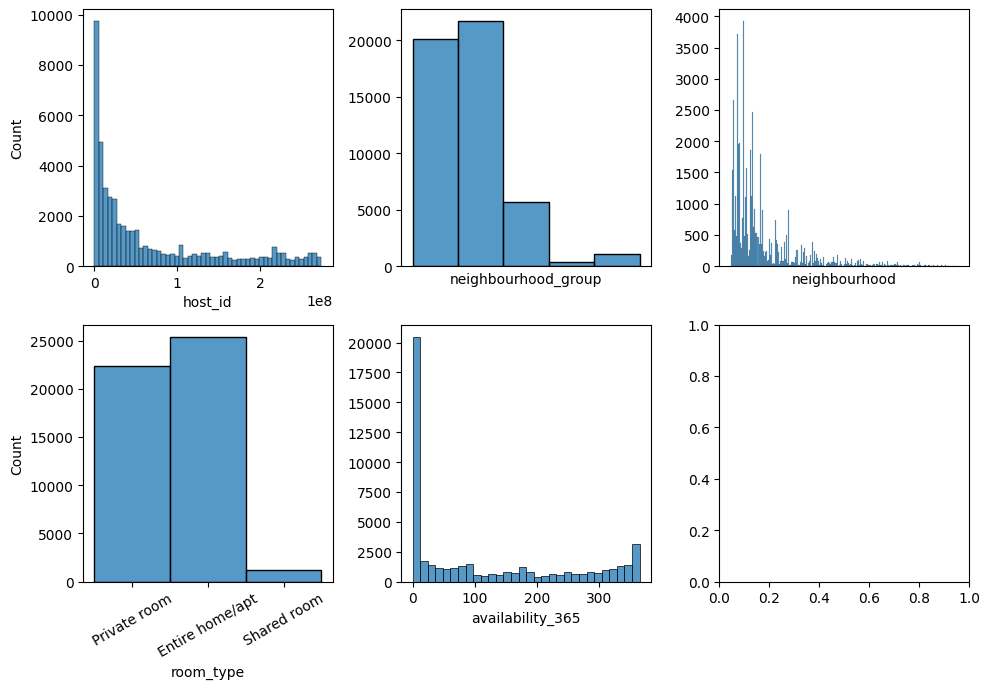

In [14]:
#Análisis de variable univariante

#Análisis de variables categóricas ()
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax=axis[0,0], data=df,x='host_id')
sns.histplot(ax=axis[0,1], data=df,x='neighbourhood_group').set(ylabel = None, xticks=[])
sns.histplot(ax=axis[0,2], data=df,x='neighbourhood').set(ylabel = None, xticks=[])
sns.histplot(ax=axis[1,0], data=df,x='room_type').set_xticklabels(axis[1,0].get_xticklabels(),rotation=30)
sns.histplot(ax=axis[1,1], data=df,x='availability_365').set(ylabel = None)

plt.tight_layout()

plt.show()

<Axes: xlabel='calculated_host_listings_count'>

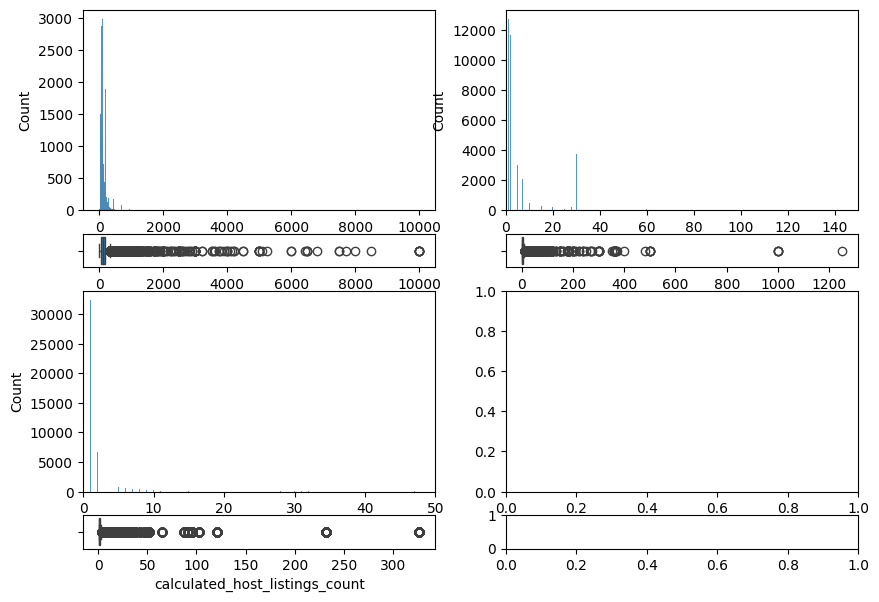

In [19]:
#variables numéricas
#price,minimum_nights,calculated_host_listings_count
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x="price")
sns.boxplot(ax=axis[1,0],data=df,x="price")

sns.histplot(ax=axis[0,1],data=df,x="minimum_nights").set_xlim(0,150)
sns.boxplot(ax=axis[1,1],data=df,x="minimum_nights")

sns.histplot(ax=axis[2,0],data=df,x="calculated_host_listings_count").set_xlim(0,50)
sns.boxplot(ax=axis[3,0],data=df,x="calculated_host_listings_count")

<Axes: >

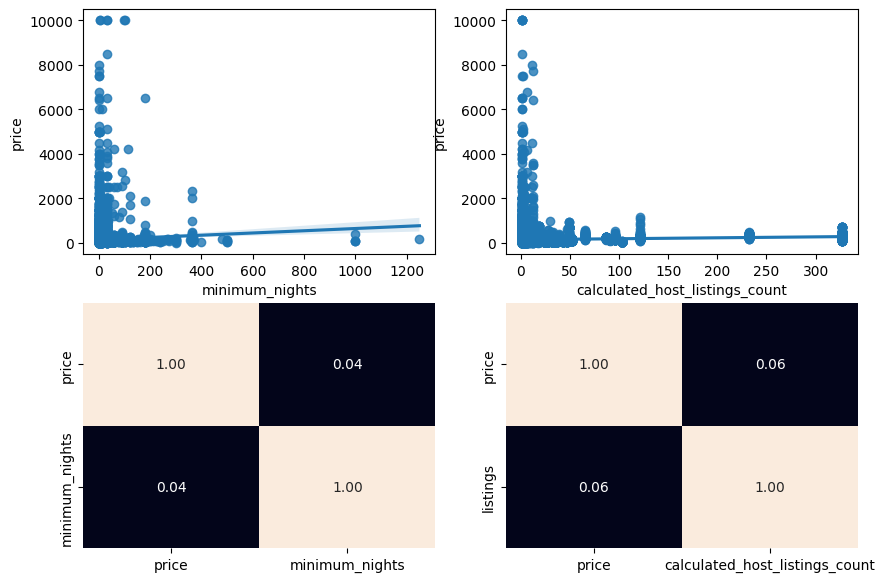

In [23]:
#Análisis multivariante

#Numérico - Númerico

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax=axis[0,0], data=df, x='minimum_nights', y='price')
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax=axis[0,1], data=df, x='calculated_host_listings_count', y='price')
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False, yticklabels=('price','listings'))

#nos muestra una correlación muy baja

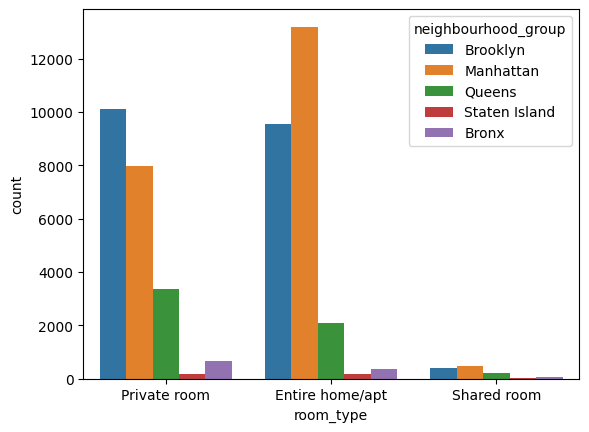

In [24]:
#análisis categorico - categorico (para hacer este categorico categorico tenemos que fijarnos que no tengan tantas variables, mirar las barras de los graficos)

sns.countplot(data =df, x = "room_type", hue = "neighbourhood_group")
plt.show()

In [ ]:
#análisis numérico - categórico
#volvemos una categorica numerico primero

df[]